In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *

Initialize hikyuu_2.6.6_202508081714_RELEASE_macosx_arm64 ...
2025-08-09 00:42:36.201 [HKU-I] - current python version: 3.12.7 (main.cpp:68)


2025-08-09 00:42:36,720 [INFO] runing in interactive session [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:109) [hikyuu::hku_info]
2025-08-09 00:42:36,720 [INFO] running in jupyter [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:116) [hikyuu::hku_info]


current plugin path: /Users/fasiondog/.hikyuu/plugin
2025-08-09 00:42:38.640 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-08-09 00:42:38.653 [HKU-I] - 加载市场信息…… (StockManager.cpp:576)
2025-08-09 00:42:38.654 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:594)
2025-08-09 00:42:38.655 [HKU-I] - 加载证券信息…… (StockManager.cpp:480)
2025-08-09 00:42:38.720 [HKU-I] - 加载权息数据…… (StockManager.cpp:612)
2025-08-09 00:42:38.844 [HKU-I] - 加载板块信息…… (StockManager.cpp:185)
2025-08-09 00:42:39.064 [HKU-I] - 加载K线数据…… (StockManager.cpp:189)
2025-08-09 00:42:39.065 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:233)
2025-08-09 00:42:39.065 [HKU-I] - 0.41 秒数据加载完毕. (StockManager.cpp:195)
2025-08-09 00:42:39.065 [HKU-I] - 启动行情接收. (SpotAgent.cpp:38)
CPU times: user 518 ms, sys: 127 ms, total: 646 ms
Wall time: 2.96 s


# 绘制组合窗口

使用 create_figure 函数快速创建查看证券K线信息的常见组合窗口
  

In [2]:
help(create_figure)

Help on function create_figure in module hikyuu.draw.drawplot:

create_figure(n=1, figsize=None)
    生成含有指定坐标轴数量的窗口，最大只支持4个坐标轴。

    :param int n: 坐标轴数量
    :param figsize: (宽, 高)
    :return: (ax1, ax2, ...) 根据指定的坐标轴数量而定，超出[1,4]个坐标轴时，返回None



(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

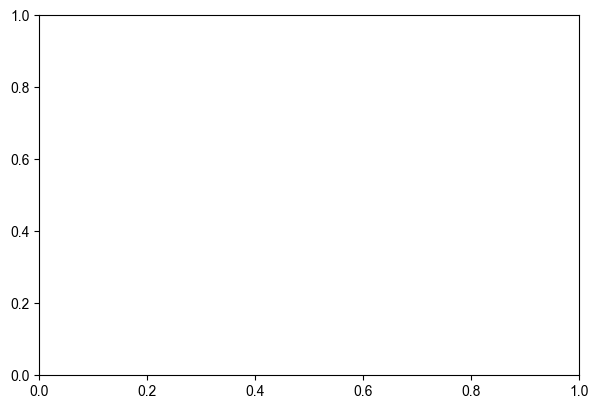

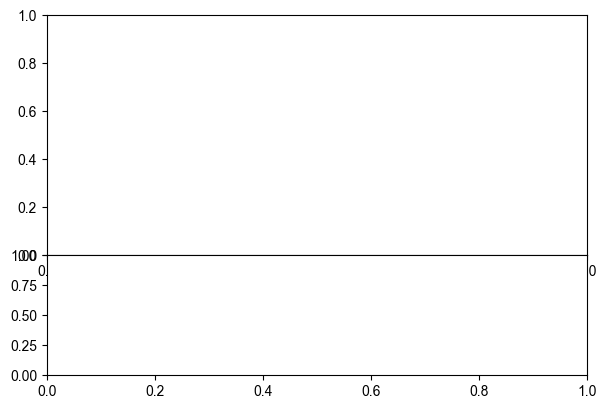

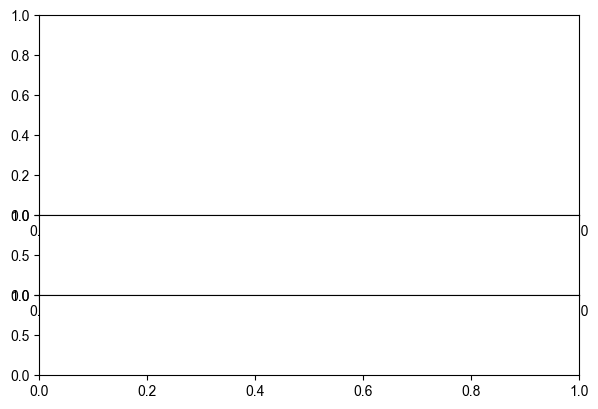

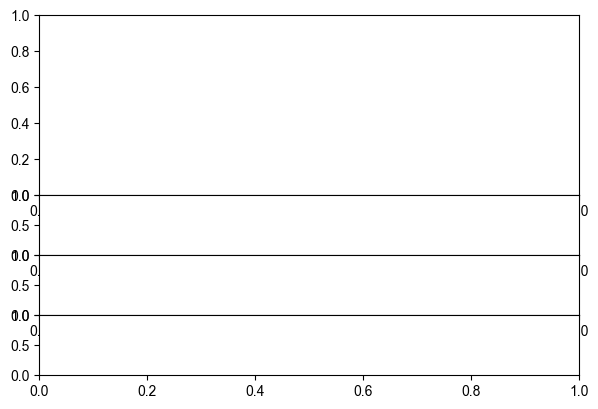

In [3]:
#不同坐标轴数量，其显示窗口布局
create_figure(figsize=(6,4))
create_figure(2, figsize=(6,4))
create_figure(3, figsize=(6,4))
create_figure(4, figsize=(6,4))

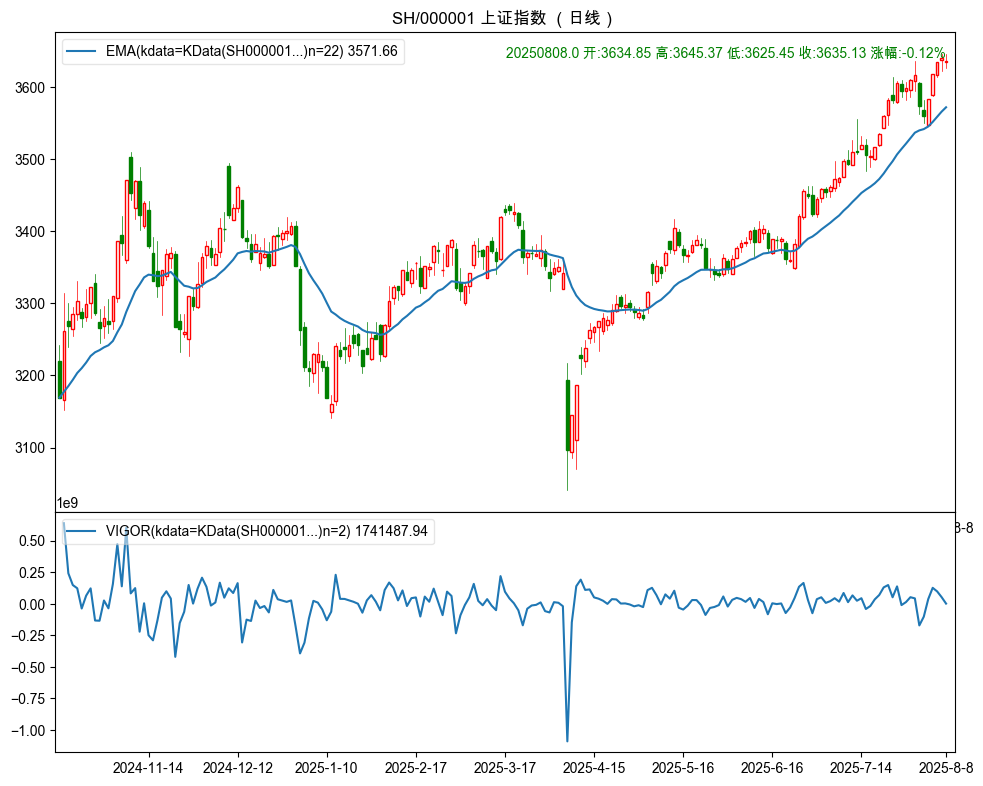

In [4]:
s = sm['sh000001']
k = s.get_kdata(Query(-200))

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = VIGOR(k)
v.plot(axes=ax2, legend_on=True)

# 绘制MACD

绘制MACD：
- ax_draw_macd
- ax_draw_macd2

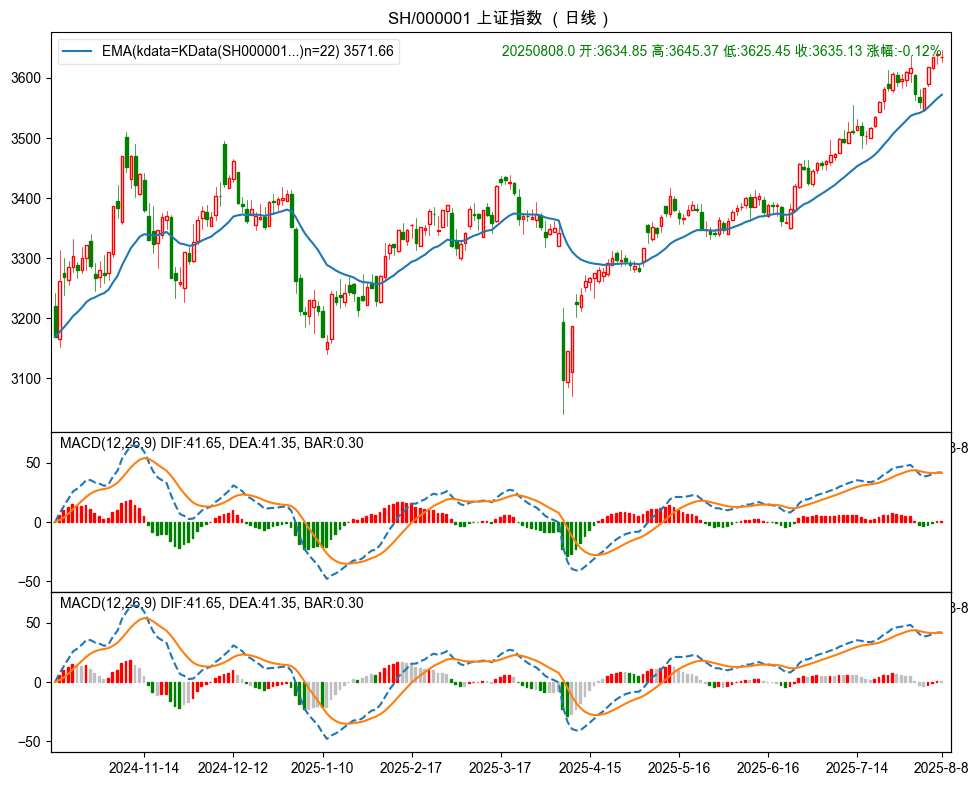

In [5]:
ax1,ax2, ax3 = create_figure(3)

k.plot(axes=ax1)
ma.plot(axes=ax1, legend_on=True)

ax_draw_macd(axes=ax2, kdata=k)
ax_draw_macd2(axes=ax3, ref=ma, kdata=k)

# 内建的三个较复杂示例

- el.draw 绘制亚历山大.艾尔德交易系统图形
- kf.draw 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- kf.draw2 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- vl.draw 绘制普通K线图 + 成交量（成交金额）
- vl.draw2 绘制普通K线图 + 成交量（成交金额）+ MACD


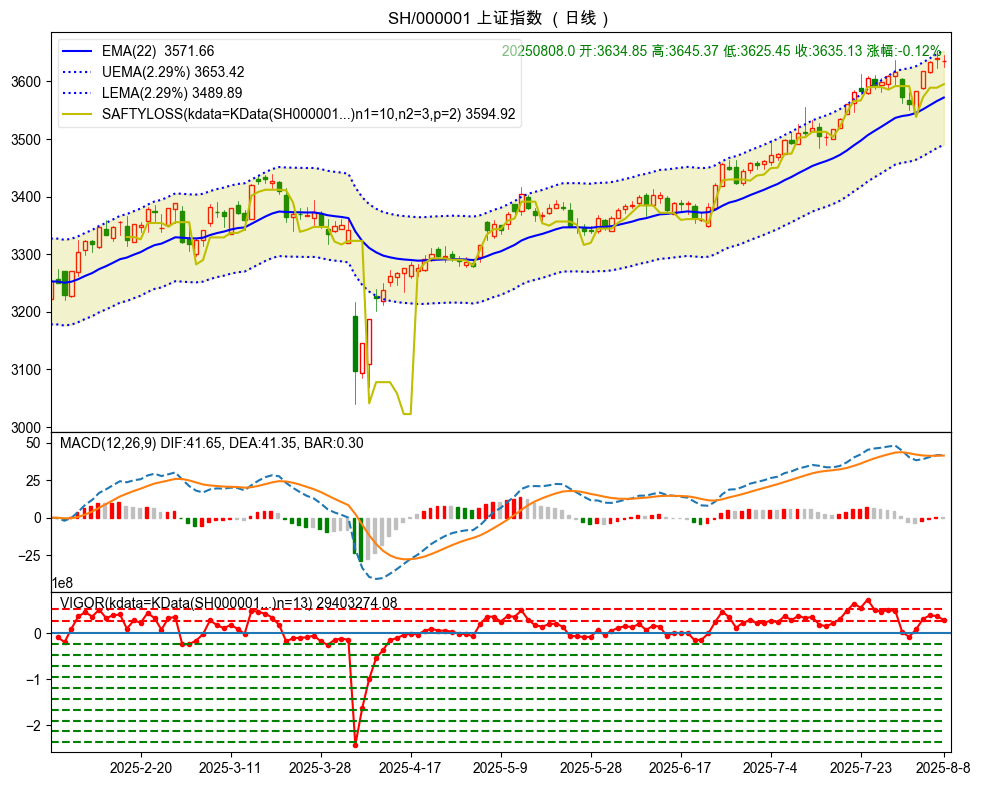

In [6]:
el.draw(s)

/Users/fasiondog/workspace/hikyuu/hikyuu/draw/drawplot/matplotlib_draw.py:468: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = axes.legend(loc='upper left')


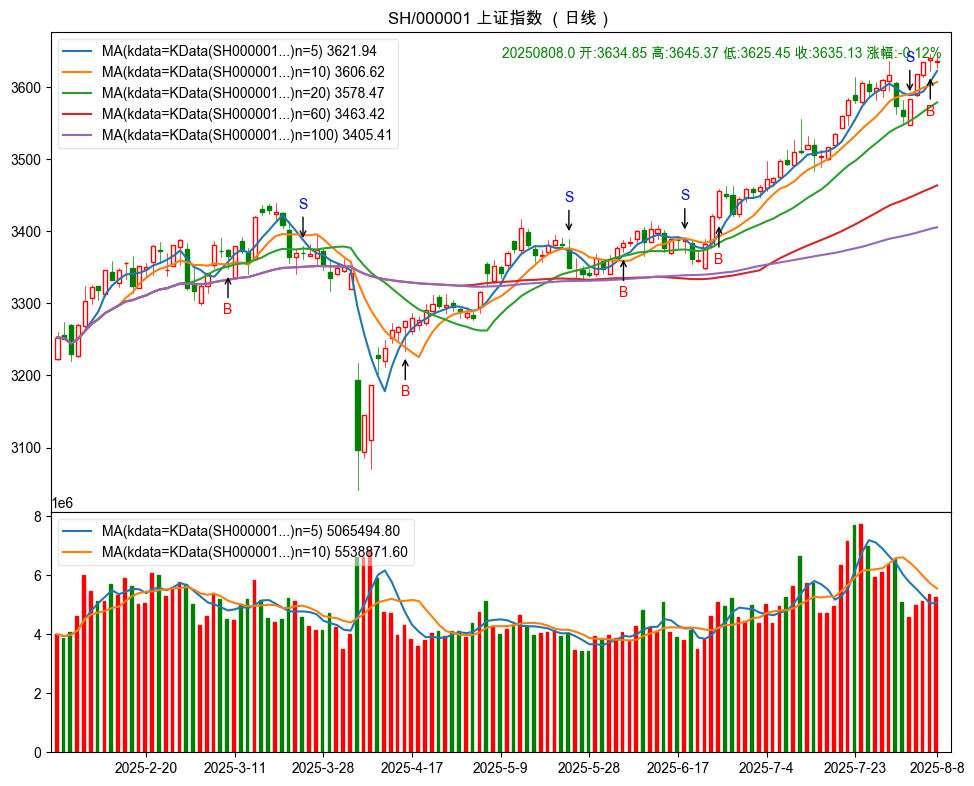

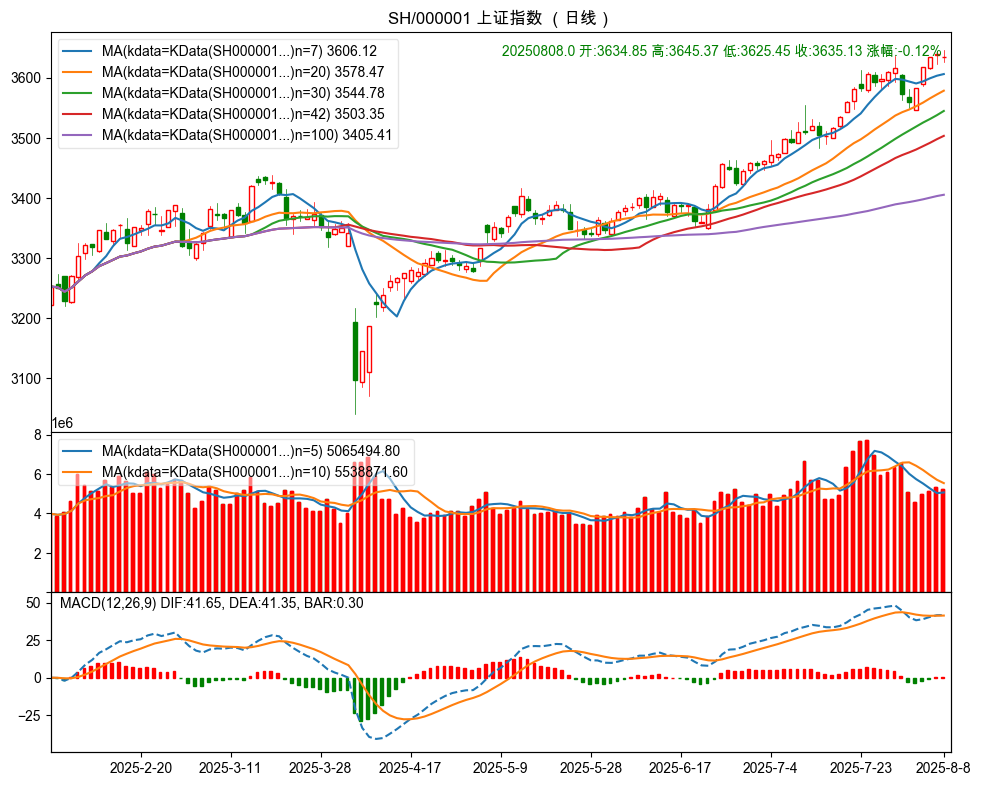

In [7]:
vl.draw(s)
vl.draw2(s)

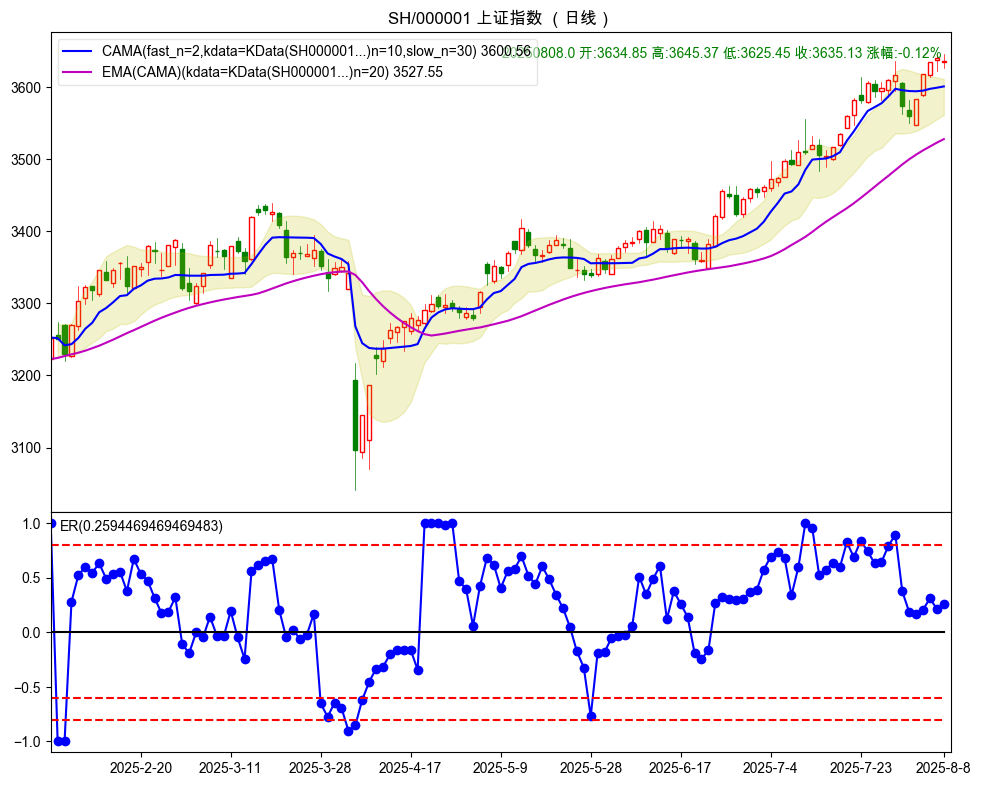

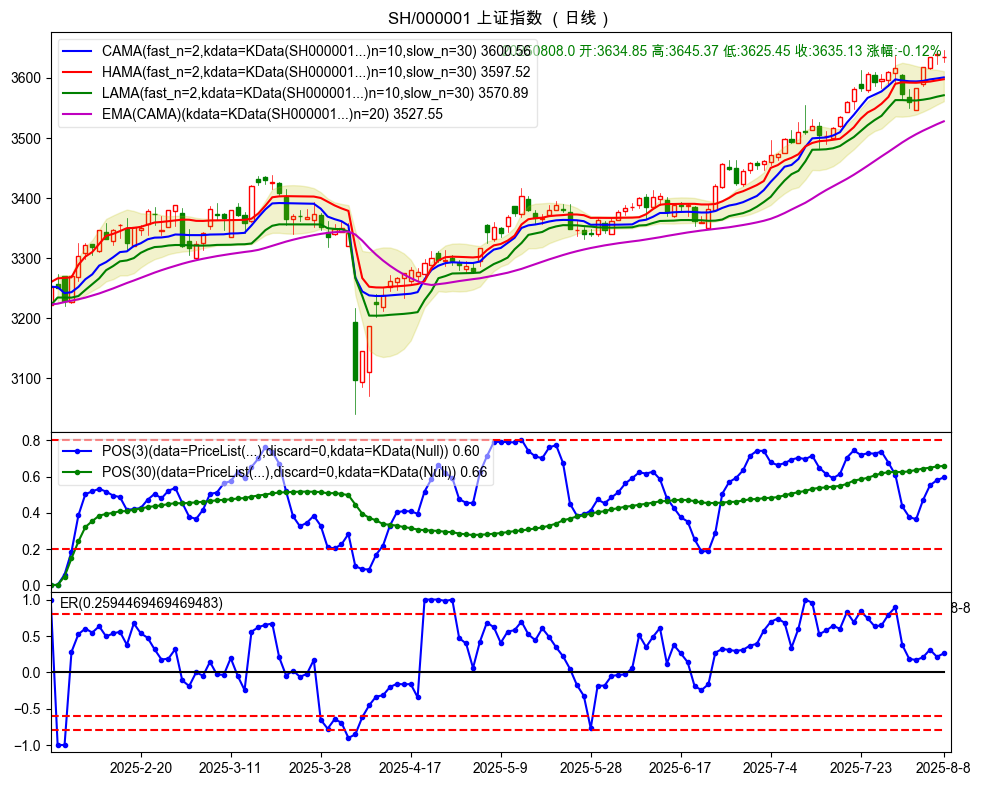

In [8]:
kf.draw(s)
kf.draw2(blocka)